In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fire = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/merged_data.csv')
fire.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,NumWorkersInStoppages,WorkStoppagesTotalDays
0,1,1992,AL,Calhoun,8.0,8.7,106723.0,138.1,4.03,35,363,3989
1,1,1992,AL,Cherokee,5.0,8.7,106723.0,138.1,4.03,35,363,3989
2,1,1992,AL,Colbert,30.0,12.1,106723.0,138.1,4.03,35,363,3989
3,1,1992,AL,Talladega,2.0,10.3,106723.0,138.1,4.03,35,363,3989
4,1,1992,AR,Montgomery,3.0,8.0,106723.0,138.1,4.03,35,363,3989


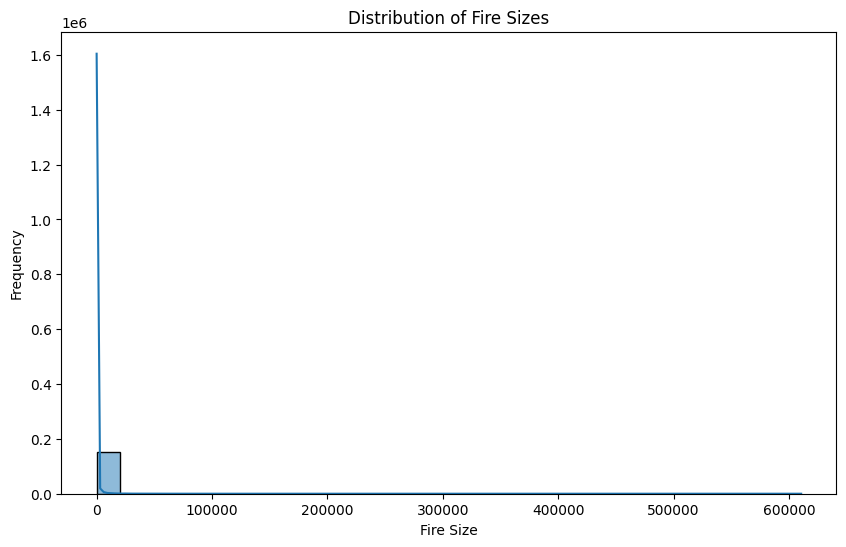

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(fire['Fire_Size'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Fire Sizes')
plt.xlabel('Fire Size')
plt.ylabel('Frequency')
plt.show()

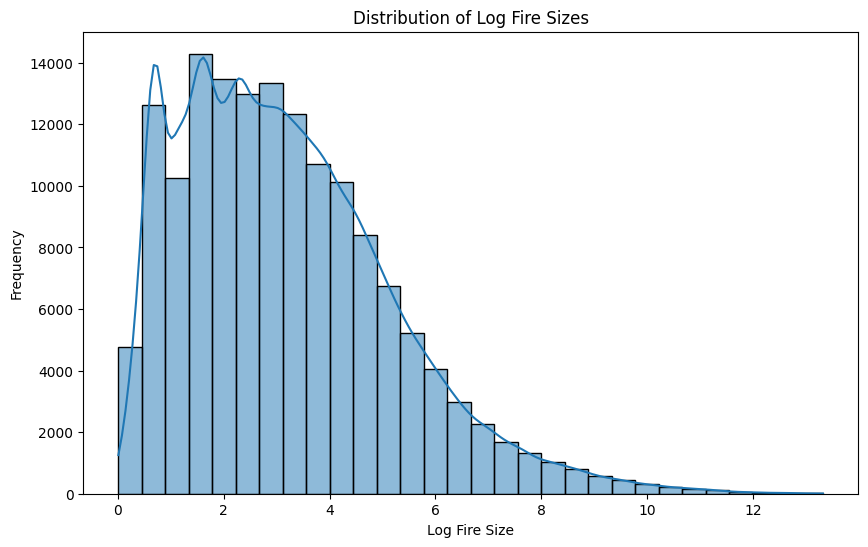

In [ ]:
fire["Log_Fire_Size"] = fire["Fire_Size"].apply(lambda x: 0 if x == 0 else np.log(x))
plt.figure(figsize=(10, 6))
sns.histplot(fire['Log_Fire_Size'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Log Fire Sizes')
plt.xlabel('Log Fire Size')
plt.ylabel('Frequency')
plt.show()

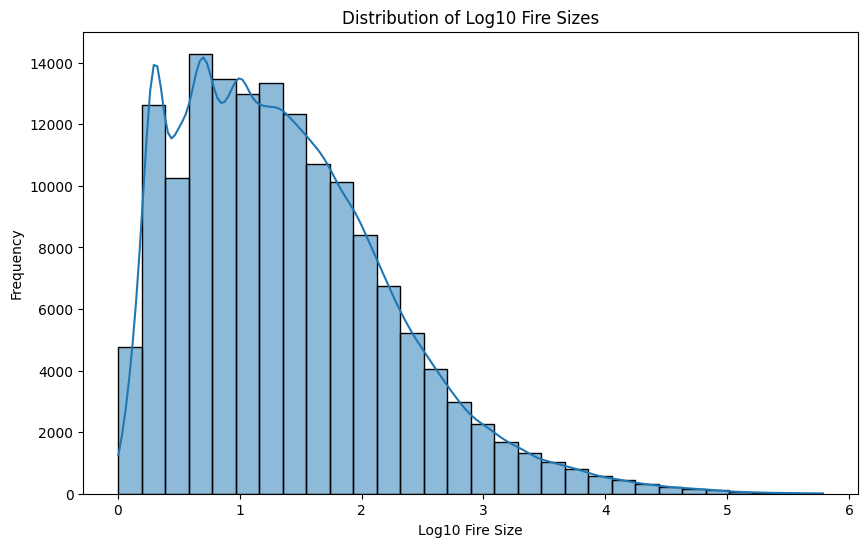

In [ ]:
fire["Log10_Fire_Size"] = fire["Fire_Size"].apply(lambda x: 0 if x == 0 else np.log10(x))
plt.figure(figsize=(10, 6))
sns.histplot(fire['Log10_Fire_Size'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Log10 Fire Sizes')
plt.xlabel('Log10 Fire Size')
plt.ylabel('Frequency')
plt.show()

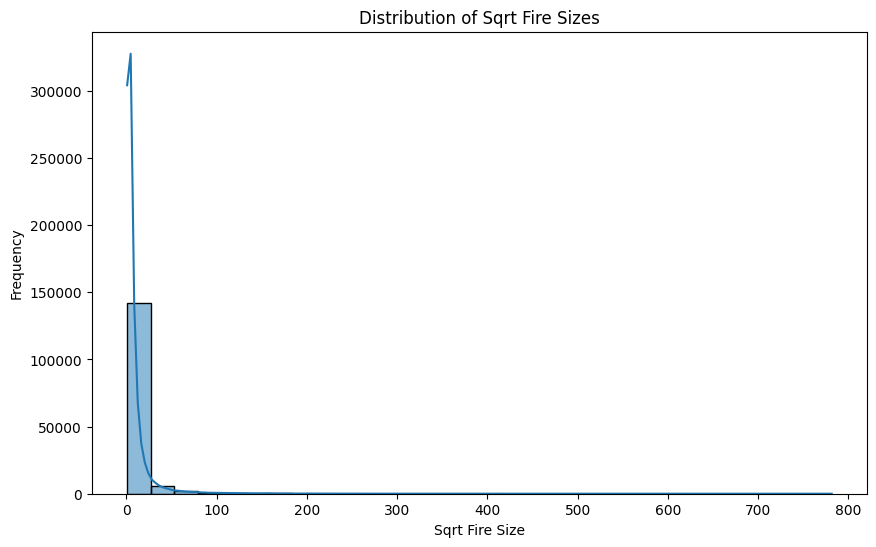

In [ ]:
fire["Sqrt_Fire_Size"] = fire["Fire_Size"].apply(lambda x: 0 if x == 0 else np.sqrt(x))
plt.figure(figsize=(10, 6))
sns.histplot(fire['Sqrt_Fire_Size'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Sqrt Fire Sizes')
plt.xlabel('Sqrt Fire Size')
plt.ylabel('Frequency')
plt.show()

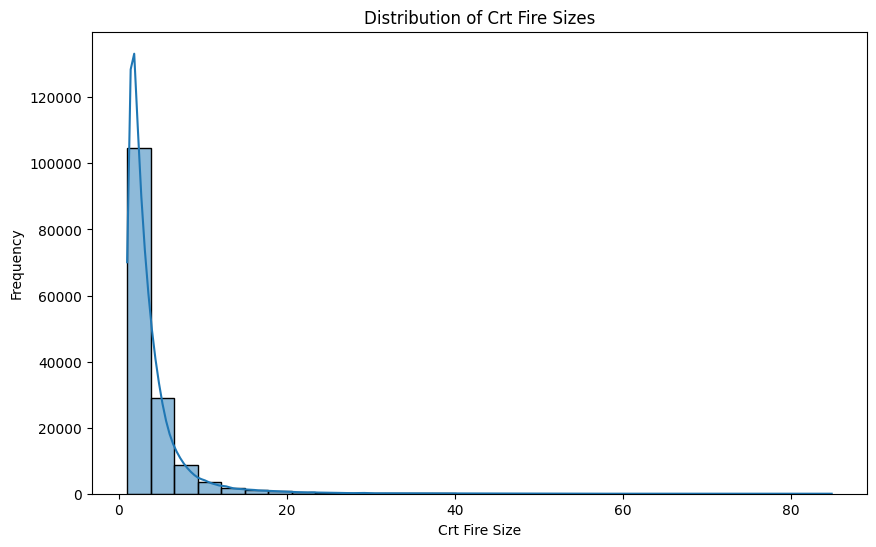

In [ ]:
fire["Crt_Fire_Size"] = fire["Fire_Size"].apply(lambda x: 0 if x == 0 else x**(1/3))
plt.figure(figsize=(10, 6))
sns.histplot(fire['Crt_Fire_Size'], bins=30, kde=True)  # Adjust bins as needed
plt.title('Distribution of Crt Fire Sizes')
plt.xlabel('Crt Fire Size')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fire["Log_Fire_Size"].describe()

,Log_Fire_Size
count,151277.000000
mean,3.193100
std,2.005717
min,0.009950
25%,1.609438
50%,2.901422
75%,4.382027
max,13.322226


In [ ]:
quintiles = fire["Log_Fire_Size"].quantile([0.2, 0.4, 0.6, 0.8])
quintiles

,Log_Fire_Size
0.2,1.386294
0.4,2.351375
0.6,3.437208
0.8,4.770685


In [ ]:
bin_edges = [fire["Log_Fire_Size"].min()] + list(quintiles) + [fire["Log_Fire_Size"].max()]
bin_labels = [f'Bin {i}' for i in range(1, 6)]
fire["Log_Fire_Size_Bin"] = pd.cut(fire["Log_Fire_Size"], bins=bin_edges, labels=bin_labels, include_lowest=True)
print(fire["Log_Fire_Size_Bin"].value_counts())

Log_Fire_Size_Bin
Bin 1    32516
Bin 4    30343
Bin 5    30160
Bin 3    30111
Bin 2    28147
Name: count, dtype: int64


In [ ]:
for bin_label in bin_labels:
    bin_data = fire[fire['Log_Fire_Size_Bin'] == bin_label]
    print(bin_data.head())

    Month  Year State      County  Fire_Size  Rate  Number of Employees  \
3       1  1992    AL   Talladega        2.0  10.3             106723.0   
4       1  1992    AR  Montgomery        3.0   8.0             106723.0   
9       1  1992    AZ    Maricopa        3.0   7.1             106723.0   
12      1  1992    CA   Calaveras        2.0  12.9             106723.0   
13      1  1992    CA    Humboldt        2.0  11.2             106723.0   

      CPI  Interest Rate  NumWorkStoppages  NumWorkersInStoppages  \
3   138.1           4.03                35                    363   
4   138.1           4.03                35                    363   
9   138.1           4.03                35                    363   
12  138.1           4.03                35                    363   
13  138.1           4.03                35                    363   

    WorkStoppagesTotalDays  Log_Fire_Size  Log10_Fire_Size  Sqrt_Fire_Size  \
3                     3989       0.693147         0.3010

In [ ]:
fire.describe()

,Month,Year,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,NumWorkersInStoppages,WorkStoppagesTotalDays,Log_Fire_Size,Log10_Fire_Size,Sqrt_Fire_Size,Crt_Fire_Size
count,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000,151277.000000
mean,6.066315,2004.283883,623.724648,6.853712,130085.663981,192.882851,2.780222,22.223398,151.020763,3073.282654,3.193100,1.386746,9.770636,3.815578
std,3.196772,6.732039,7759.304493,3.193388,8160.463652,30.356721,2.285146,9.847439,116.828441,4211.194612,2.005717,0.871072,22.983969,4.109492
min,1.000000,1992.000000,1.010000,0.500000,106723.000000,138.100000,0.070000,5.000000,12.000000,124.000000,0.009950,0.004321,1.004988,1.003322
25%,3.000000,1999.000000,5.000000,4.600000,128448.000000,166.200000,0.160000,15.000000,54.000000,740.000000,1.609438,0.698970,2.236068,1.709976
50%,6.000000,2005.000000,18.200000,6.200000,131698.000000,193.300000,2.960000,19.000000,112.000000,1736.000000,2.901422,1.260071,4.266146,2.630412
75%,9.000000,2010.000000,80.000000,8.400000,135905.000000,218.815000,5.220000,29.000000,191.000000,4091.000000,4.382027,1.903090,8.944272,4.308869
max,12.000000,2015.000000,610617.500000,40.400000,144049.000000,238.654000,6.540000,45.000000,393.000000,20419.000000,13.322226,5.785769,781.420181,84.837869


In [ ]:
fire['Date'] = pd.to_datetime(fire['Year'].astype(str) + '-' + fire['Month'].astype(str))
fire.sort_values('Date', inplace=True)

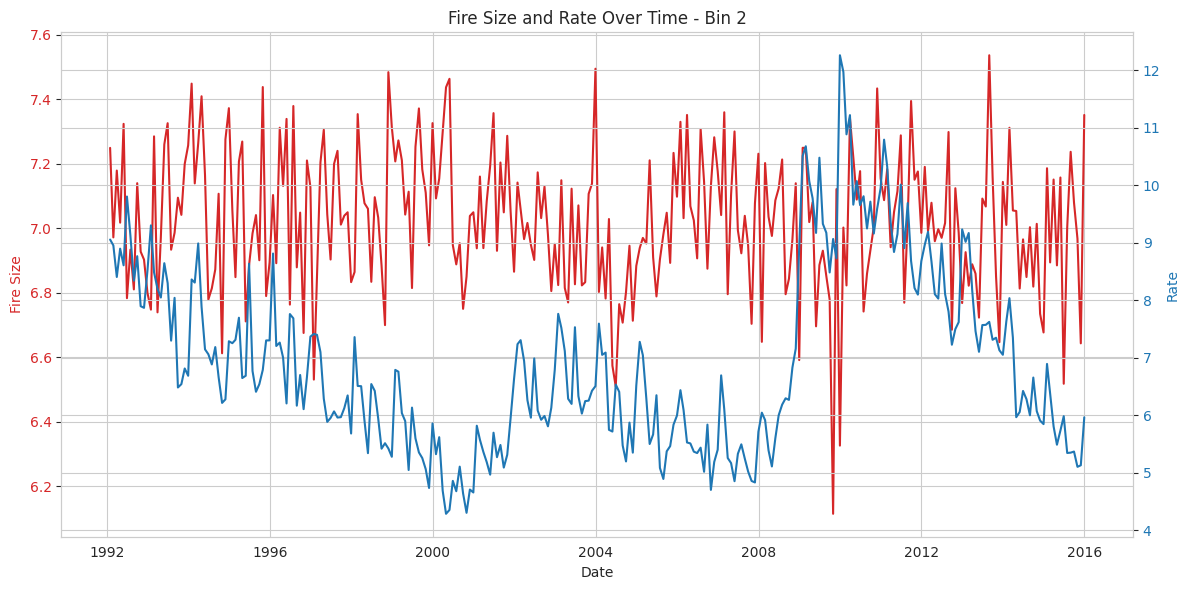

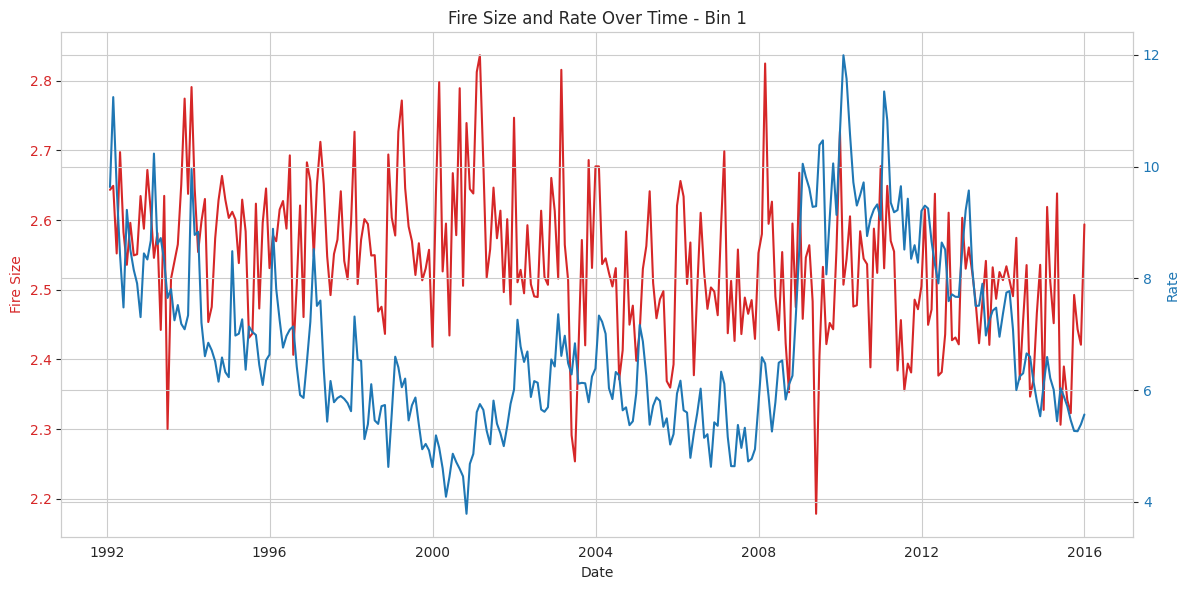

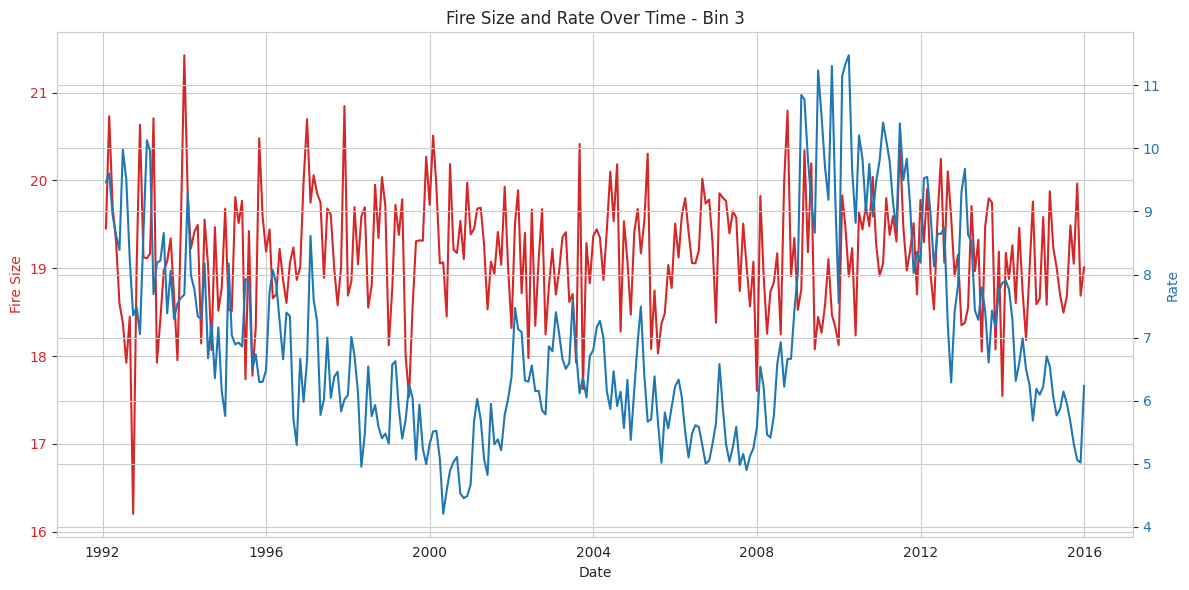

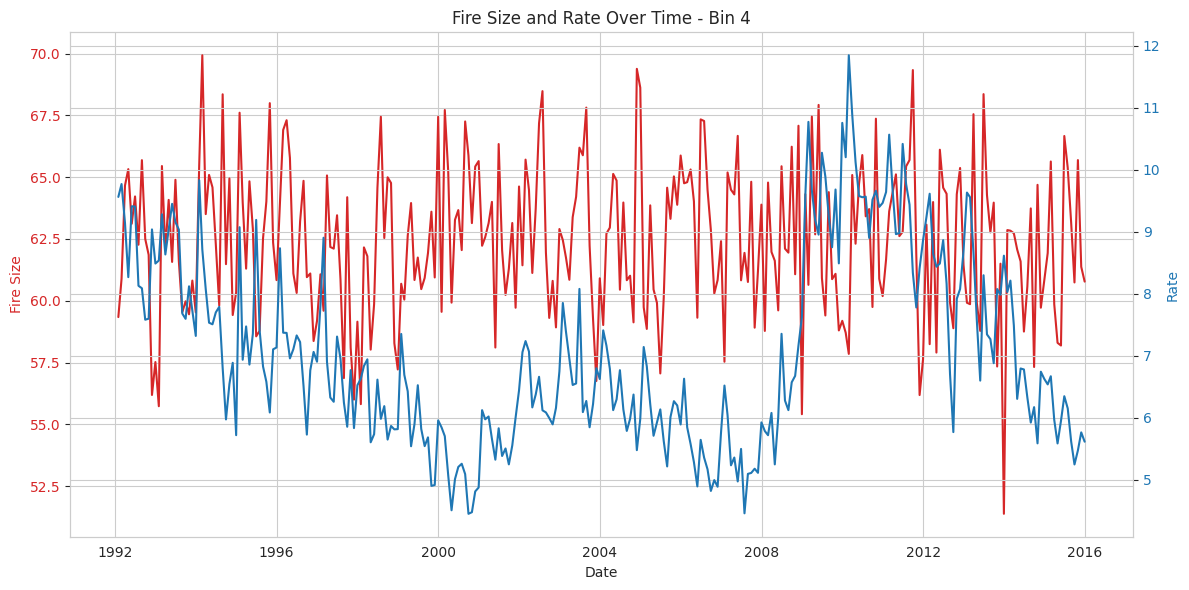

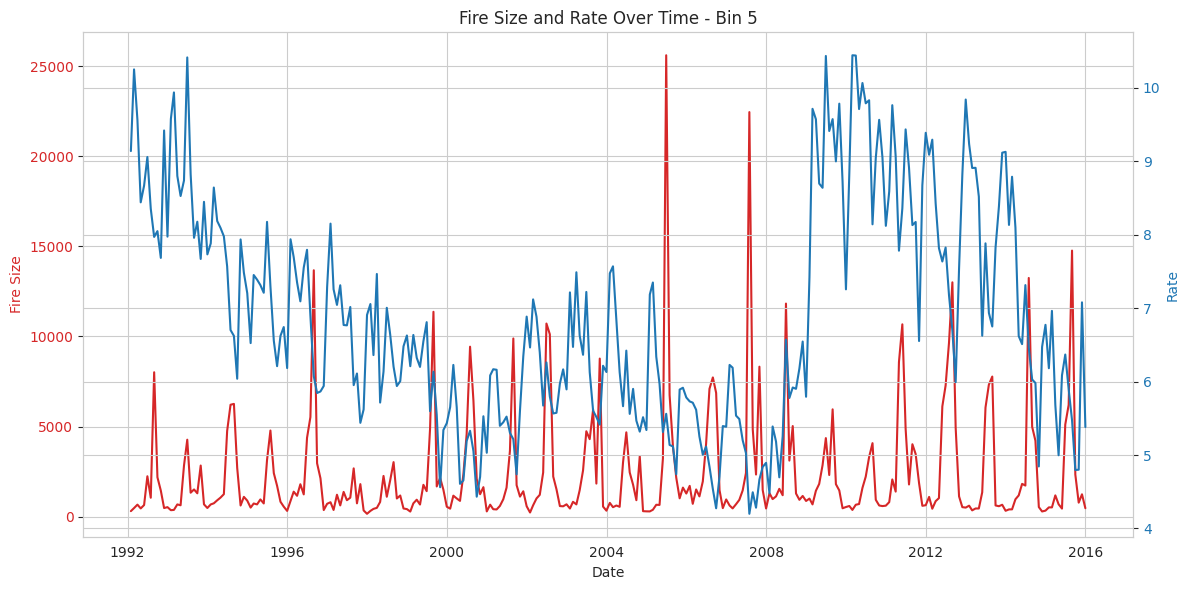

In [ ]:
bins = fire['Log_Fire_Size_Bin'].unique()
sns.set_style('whitegrid')

# Creating a graph for each bin
for bin_label in bins:
    bin_data = fire[fire['Log_Fire_Size_Bin'] == bin_label]
    bin_data.set_index("Date", inplace=True)
    bin_data = bin_data.resample('ME').mean(numeric_only=True).reset_index()

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Plotting fire size
    color = 'tab:red'
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Fire Size', color=color)
    ax1.plot(bin_data['Date'], bin_data['Fire_Size'], color=color, label='Fire Size')
    ax1.tick_params(axis='y', labelcolor=color)


    ax2 = ax1.twinx()

    # Plotting rate
    color = 'tab:blue'
    ax2.set_ylabel('Rate', color=color)
    ax2.plot(bin_data['Date'], bin_data['Rate'], color=color, label='Rate')
    ax2.tick_params(axis='y', labelcolor=color)
    plt.title(f'Fire Size and Rate Over Time - {bin_label}')
    fig.tight_layout()
    plt.show()

In [ ]:
fire.reset_index(drop=True).to_csv("/content/drive/MyDrive/UnemploymentProject/CleanDatasets/binned_fire.csv", index=False)

##Visualizations for largest fires

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
fire = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/merged_data.csv')
print(fire.head(5))
print(fire.describe())

   Month  Year State      County  Fire_Size  Rate  Number of Employees    CPI  \
0      1  1992    AL     Calhoun        8.0   8.7             106723.0  138.1   
1      1  1992    AL    Cherokee        5.0   8.7             106723.0  138.1   
2      1  1992    AL     Colbert       30.0  12.1             106723.0  138.1   
3      1  1992    AL   Talladega        2.0  10.3             106723.0  138.1   
4      1  1992    AR  Montgomery        3.0   8.0             106723.0  138.1   

   Interest Rate  NumWorkStoppages  NumWorkersInStoppages  \
0           4.03                35                    363   
1           4.03                35                    363   
2           4.03                35                    363   
3           4.03                35                    363   
4           4.03                35                    363   

   WorkStoppagesTotalDays  
0                    3989  
1                    3989  
2                    3989  
3                    3989  
4     

In [ ]:
fire['Date'] = pd.to_datetime(fire[['Year', 'Month']].assign(DAY=1))
county_monthly_data = fire.groupby(['County', 'Date']).agg({
    'Fire_Size': 'sum',
    'Rate': 'mean'
}).reset_index()

In [ ]:
def get_large(df, percentile=0.95):
    threshold = df['Fire_Size'].quantile(percentile)
    df['Large_Fire'] = df['Fire_Size'] >= threshold
    return df
county_monthly_data = county_monthly_data.groupby('County', group_keys=False).apply(get_large)

<ipython-input-19-94b669505c1c>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  county_monthly_data = county_monthly_data.groupby('County', group_keys=False).apply(get_large)


In [ ]:
window = 6  # Number of months before and after the event
results = []

for county in county_monthly_data['County'].unique():
    county_data = county_monthly_data[county_monthly_data['County'] == county]
    county_data = county_data.set_index('Date')
    large_fire_dates = county_data[county_data['Large_Fire']].index
    for event_date in large_fire_dates:
        for offset in range(-window, window + 1):
            current_date = event_date + pd.DateOffset(months=offset)
            if current_date in county_data.index:
                results.append({
                    'County': county,
                    'EventMonth': event_date,
                    'Offset': offset,
                    'Date': current_date,
                    'Rate': county_data.loc[current_date, 'Rate'],
                    'Fire_Size': county_data.loc[current_date, 'Fire_Size']
                })

event_data = pd.DataFrame(results)

In [ ]:
print(event_data.head())
print(event_data.describe())

      County EventMonth  Offset       Date  Rate  Fire_Size
0  Abbeville 1992-02-01      -1 1992-01-01   7.5       13.0
1  Abbeville 1992-02-01       0 1992-02-01   7.5      134.0
2  Abbeville 1992-02-01       1 1992-03-01   6.7       63.0
3  Abbeville 1992-02-01       2 1992-04-01   5.7       24.0
4  Abbeville 1992-02-01       3 1992-05-01   6.1       15.0
                          EventMonth        Offset  \
count                          48700  48700.000000   
mean   2004-07-30 04:41:27.917864576     -0.115565   
min              1992-01-01 00:00:00     -6.000000   
25%              1999-11-01 00:00:00     -3.000000   
50%              2005-08-01 00:00:00      0.000000   
75%              2010-09-01 00:00:00      2.000000   
max              2015-12-01 00:00:00      6.000000   
std                              NaN      3.343328   

                                Date          Rate      Fire_Size  
count                          48700  48700.000000   48700.000000  
mean   2004-07-26

In [ ]:
avg_rate_by_offset = event_data.groupby('Offset')['Rate'].mean().reset_index()

In [ ]:
N = 15

top_largest_fires = event_data.nlargest(N, "Fire_Size")
print(f"Top {N} counties with the most large fires: {top_largest_fires['County'].unique()}")

Top 15 counties with the most large fires: ['Washington', 'Jackson', 'Jefferson', 'Lincoln', 'Calhoun', 'Pike', 'Wayne', 'Perry', 'Grant', 'Harrison', 'Union', 'Lee', 'Lawrence', 'Cherokee', 'Montgomery']


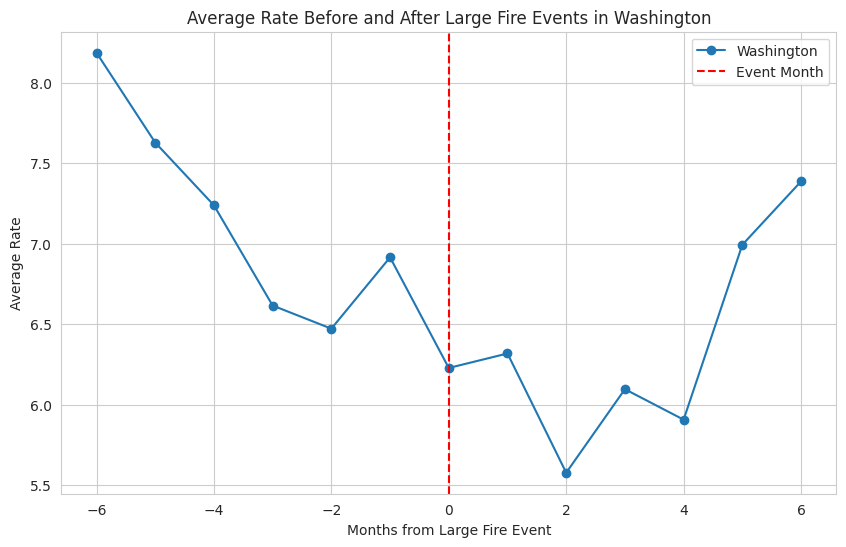

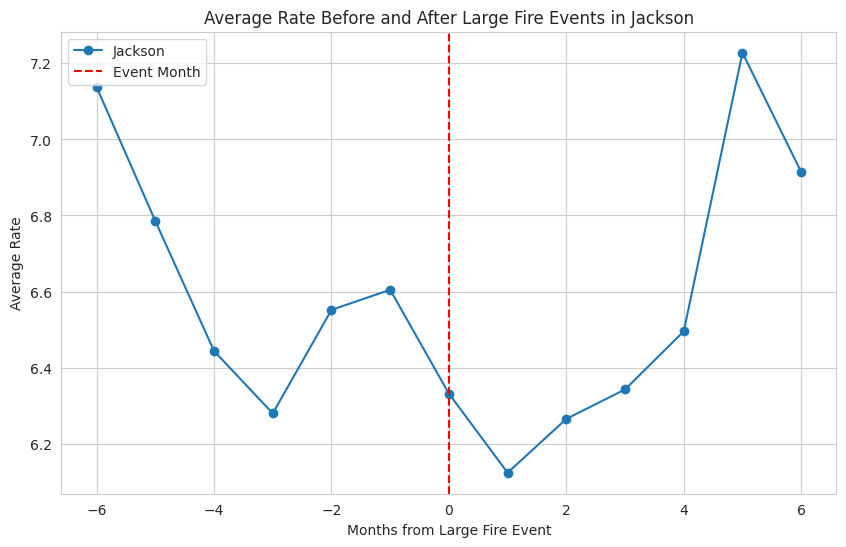

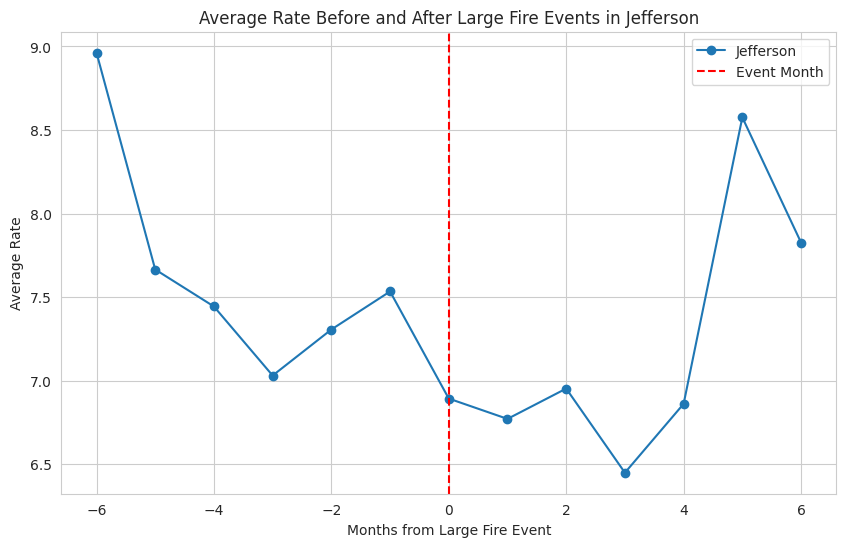

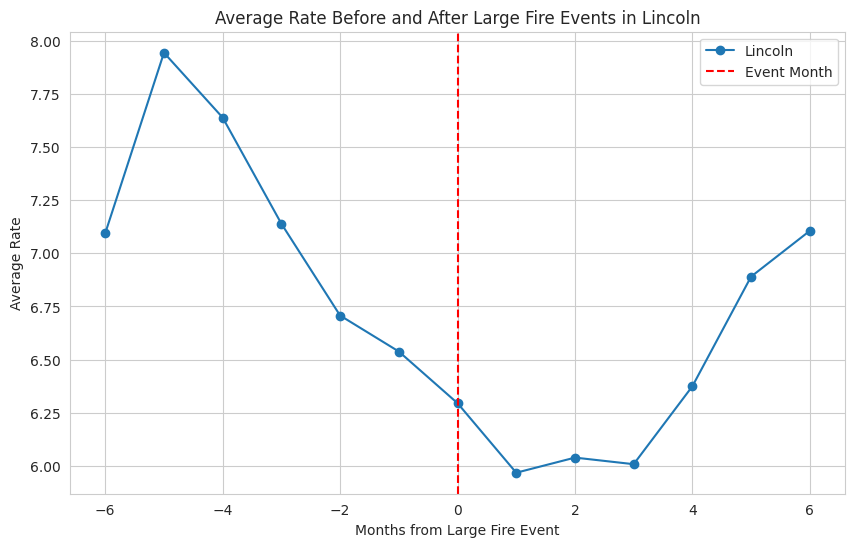

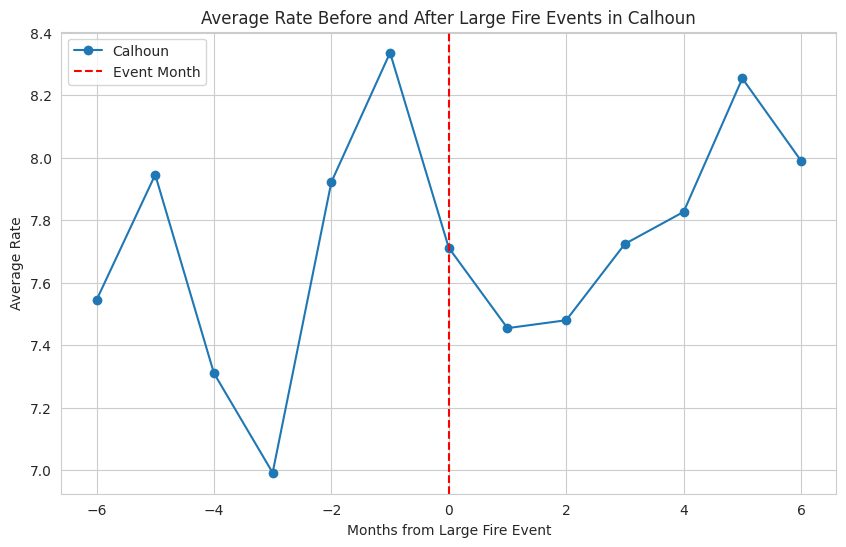

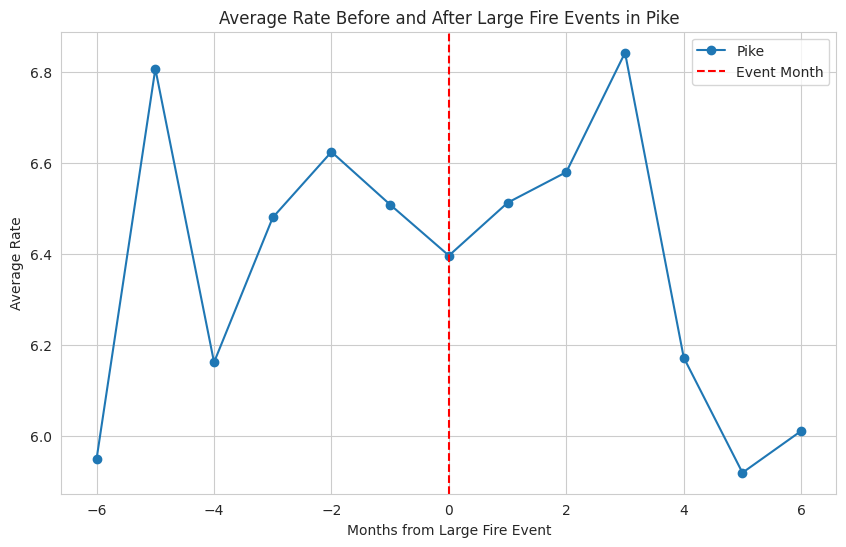

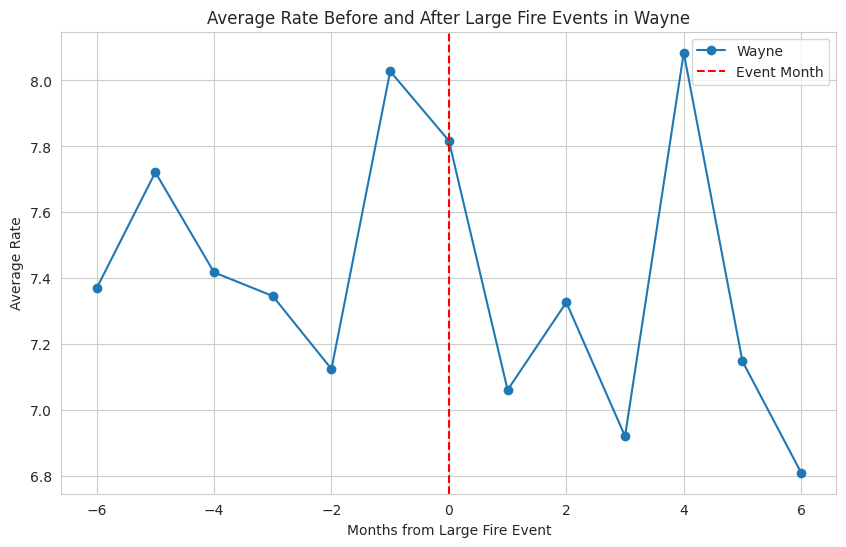

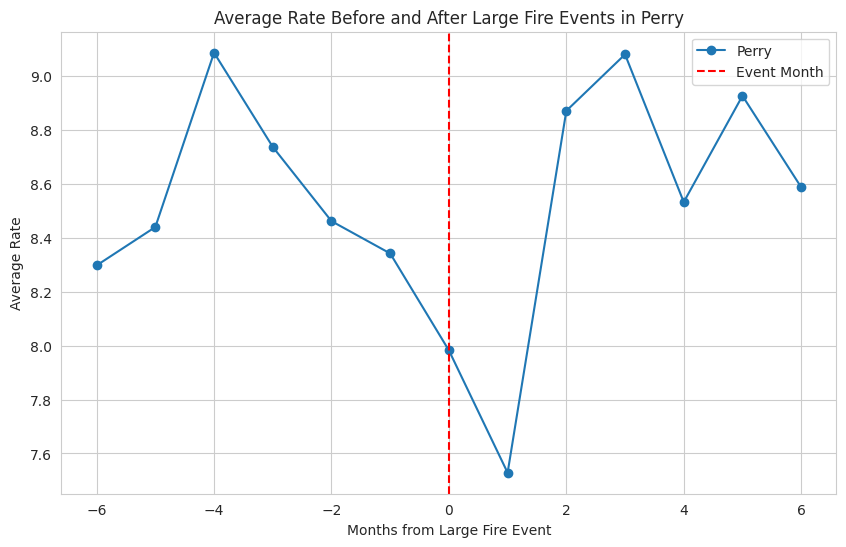

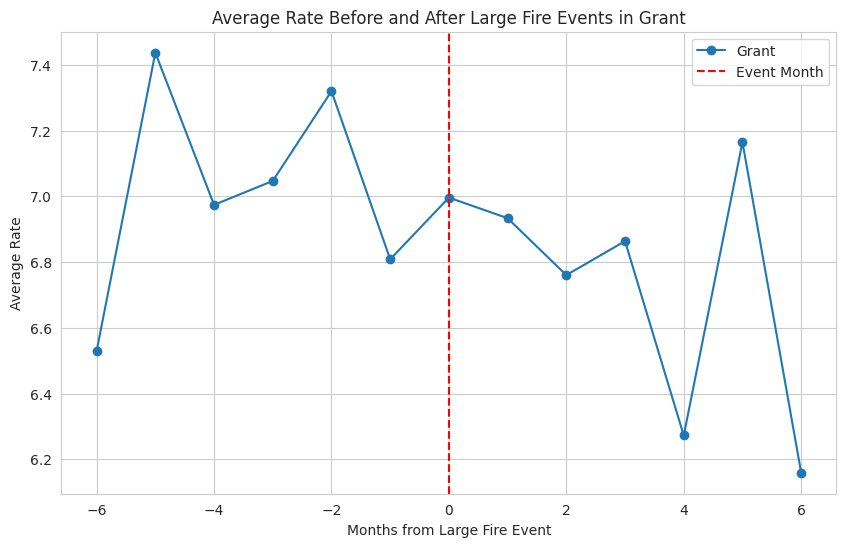

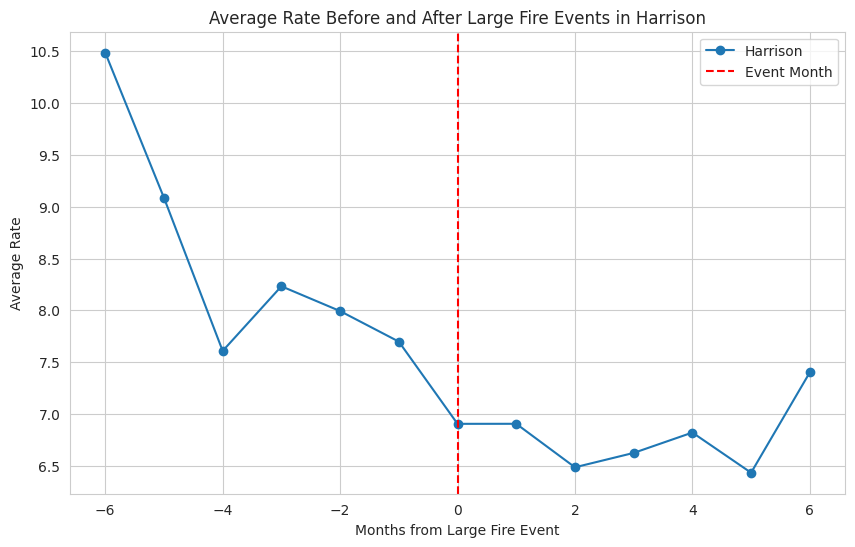

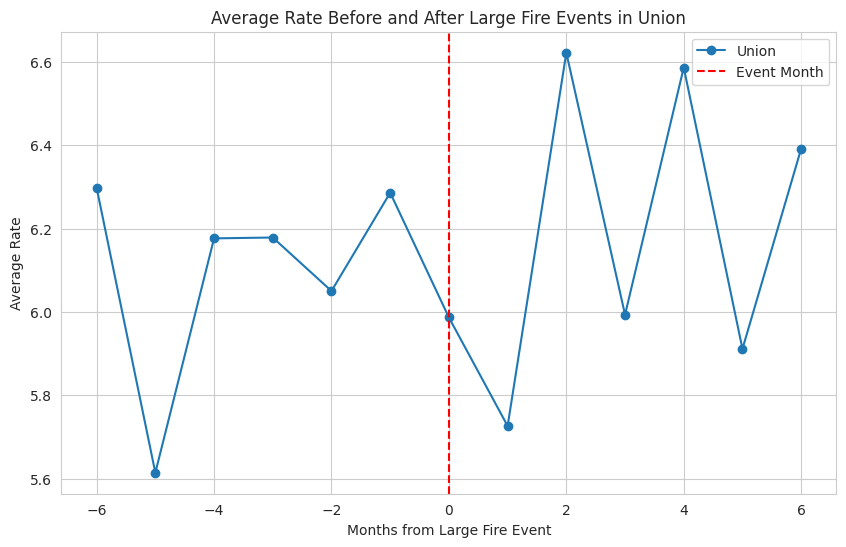

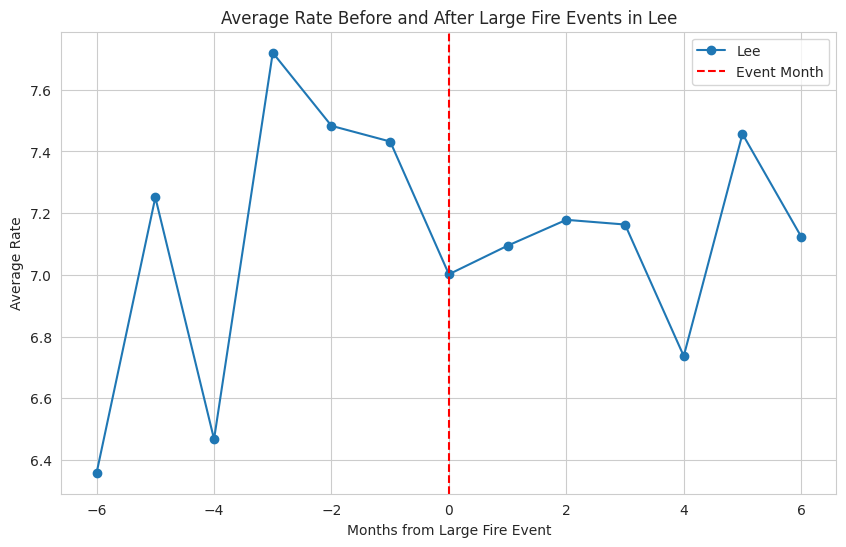

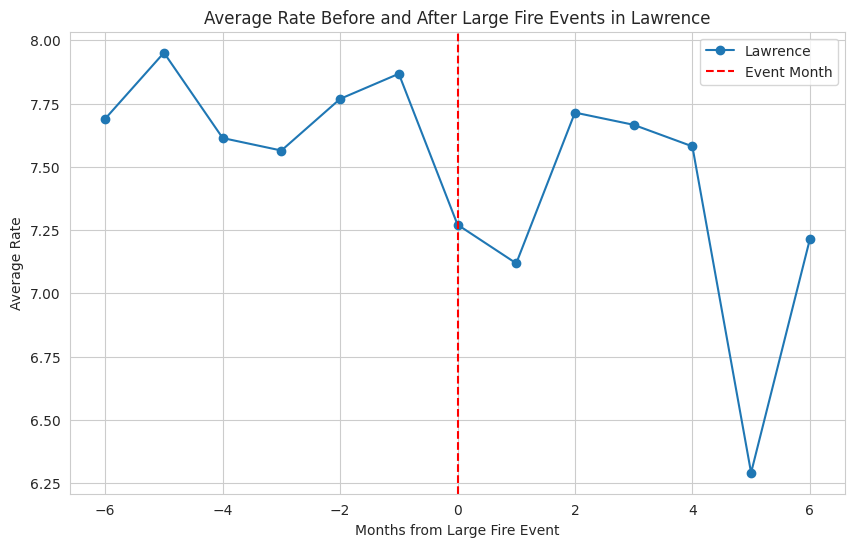

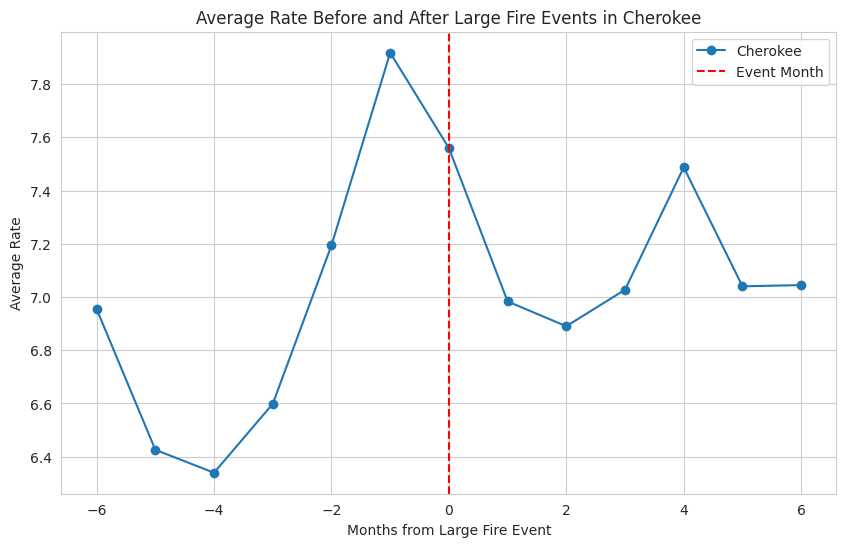

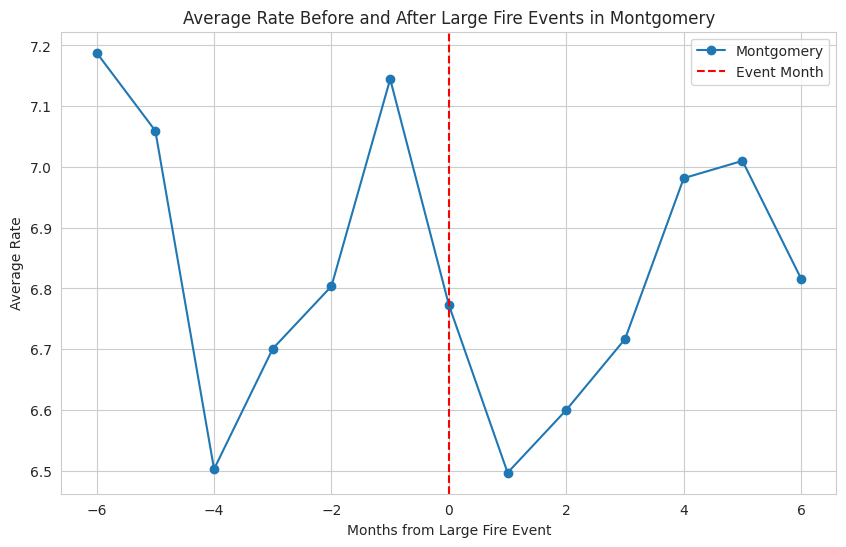

In [ ]:
N = 15  # Number of top counties to analyze

# Identify counties with the most large fires
large_fire_counts = event_data[event_data['Offset'] == 0]['County'].value_counts()
top_counties = large_fire_counts.nlargest(N).index.tolist()

print(f"Top {N} counties with the most large fires: {top_counties}")
event_data_top = event_data[event_data['County'].isin(top_counties)]
avg_rate_by_offset_county = (
    event_data_top
    .groupby(['County', 'Offset'])['Rate']
    .mean()
    .reset_index()
)
for county in top_counties:
    county_data = avg_rate_by_offset_county[avg_rate_by_offset_county['County'] == county]
    plt.figure(figsize=(10, 6))
    plt.plot(county_data['Offset'], county_data['Rate'], marker='o', label=f'{county}')
    plt.axvline(0, color='red', linestyle='--', label='Event Month')
    plt.xlabel('Months from Large Fire Event')
    plt.ylabel('Average Rate')
    plt.title(f'Average Rate Before and After Large Fire Events in {county}')
    plt.legend()
    plt.grid(True)
    plt.show()

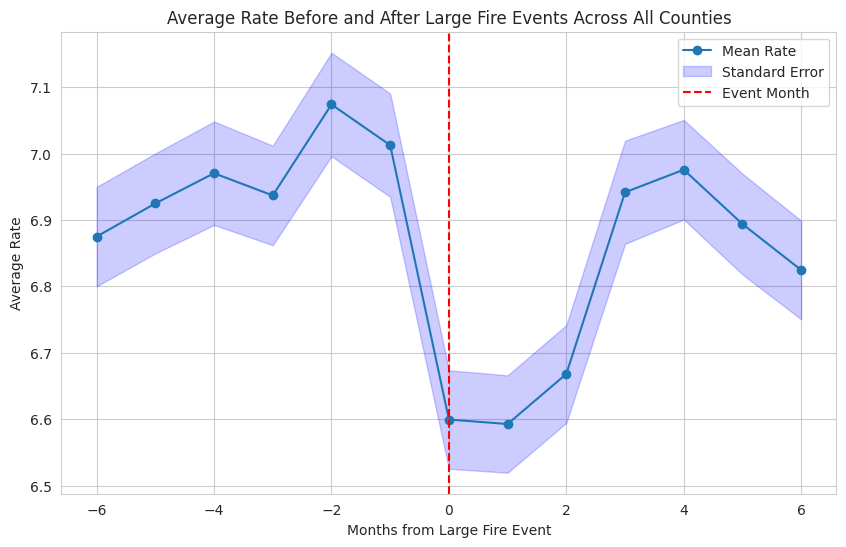

In [ ]:
stats_by_offset = event_data.groupby('Offset')['Rate'].agg(['mean', 'std']).reset_index()

stats_by_offset['stderr'] = stats_by_offset['std'] / np.sqrt(event_data['County'].nunique())

plt.figure(figsize=(10, 6))
plt.plot(stats_by_offset['Offset'], stats_by_offset['mean'], marker='o', label='Mean Rate')
plt.fill_between(
    stats_by_offset['Offset'],
    stats_by_offset['mean'] - stats_by_offset['stderr'],
    stats_by_offset['mean'] + stats_by_offset['stderr'],
    color='blue',
    alpha=0.2,
    label='Standard Error'
)
plt.axvline(0, color='red', linestyle='--', label='Event Month')
plt.xlabel('Months from Large Fire Event')
plt.ylabel('Average Rate')
plt.title('Average Rate Before and After Large Fire Events Across All Counties')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from math import nan
from scipy.stats import ttest_rel
for county in event_data['County'].unique():
    county_event_data = event_data[event_data['County'] == county]
    before = county_event_data[county_event_data['Offset'] < 0]['Rate']
    after = county_event_data[county_event_data['Offset'] > 0]['Rate']

    if len(before) == len(after):
        t_stat, p_value = ttest_rel(before, after)
        if t_stat != None and p_value != None:
          print(f"County: {county}, T-statistic: {t_stat:.3f}, P-value: {p_value:.3f}")

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1087: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


County: Addison, T-statistic: nan, P-value: nan
County: Alamance, T-statistic: -1.053, P-value: 0.315
County: Alamosa, T-statistic: nan, P-value: nan
County: Alfalfa, T-statistic: nan, P-value: nan
County: Allegany, T-statistic: 6.740, P-value: 0.021
County: Allegheny, T-statistic: nan, P-value: nan
County: Allen, T-statistic: nan, P-value: nan
County: Alpine, T-statistic: 1.062, P-value: 0.481
County: Amelia, T-statistic: 0.364, P-value: 0.751
County: Amherst, T-statistic: -0.956, P-value: 0.371
County: Andrews, T-statistic: 3.846, P-value: 0.003
County: Androscoggin, T-statistic: nan, P-value: nan
County: Anne Arundel, T-statistic: nan, P-value: nan
County: Anoka, T-statistic: -1.099, P-value: 0.322
County: Antelope, T-statistic: nan, P-value: nan
County: Aransas, T-statistic: 1.500, P-value: 0.374
County: Archer, T-statistic: 0.118, P-value: 0.908
County: Arkansas, T-statistic: nan, P-value: nan
County: Aroostook, T-statistic: 1.997, P-value: 0.116
County: Audubon, T-statistic: nan,

In [ ]:
fire = pd.read_csv('/content/drive/MyDrive/UnemploymentProject/CleanDatasets/merged_data.csv')
fire.head()

,Month,Year,State,County,Fire_Size,Rate,Number of Employees,CPI,Interest Rate,NumWorkStoppages,NumWorkersInStoppages,WorkStoppagesTotalDays
0,1,1992,AL,Calhoun,8.0,8.7,106723.0,138.1,4.03,35,363,3989
1,1,1992,AL,Cherokee,5.0,8.7,106723.0,138.1,4.03,35,363,3989
2,1,1992,AL,Colbert,30.0,12.1,106723.0,138.1,4.03,35,363,3989
3,1,1992,AL,Talladega,2.0,10.3,106723.0,138.1,4.03,35,363,3989
4,1,1992,AR,Montgomery,3.0,8.0,106723.0,138.1,4.03,35,363,3989


In [ ]:
fire['Date'] = pd.to_datetime(fire[['Year', 'Month']].assign(DAY=1))

# top N counties with the largest fires
# (Will only include counties that have enough data for the defined time frame below)
N = 35

# Changing these will change how many months back and forward from the large fire that will be graphed
back_months = 3
forward_months = 6

fires_sorted = fire.sort_values(by='Fire_Size', ascending=False)

counties_with_complete_data = []
processed_counties = set()

# This loops to find the N largest, ignoring counties that have missing data for the specified time frame
for idx, row in fires_sorted.iterrows():
    county = row['County']
    state = row['State']
    fire_date = row['Date']
    fire_size = row['Fire_Size']

    if (state, county) in processed_counties:
        continue

    # Defining the time frame
    start_date = fire_date - pd.DateOffset(months=back_months)
    end_date = fire_date + pd.DateOffset(months=forward_months)

    # Creating the time frame
    date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
    date_df = pd.DataFrame({'Date': date_range})

    county_data = fire[(fire['County'] == county) & (fire['State'] == state)]
    county_data = county_data[['Date', 'Rate']].drop_duplicates()
    county_data_full = pd.merge(date_df, county_data, on='Date', how='left')

    # Check if any unemployment rate data is missing to make sure that all graphs have enough data for the time frame
    if county_data_full['Rate'].isnull().any():
        continue

    counties_with_complete_data.append((idx, row))
    processed_counties.add((state, county))
    if len(counties_with_complete_data) == N:
        break

for idx, row in counties_with_complete_data:
    county = row['County']
    state = row['State']
    fire_date = row['Date']
    fire_size = row['Fire_Size']

    start_date = fire_date - pd.DateOffset(months=back_months)
    end_date = fire_date + pd.DateOffset(months=forward_months)

    date_range = pd.date_range(start=start_date, end=end_date, freq='MS')
    date_df = pd.DataFrame({'Date': date_range})

    county_data = fire[(fire['County'] == county) & (fire['State'] == state)]
    county_data = county_data[['Date', 'Rate']].drop_duplicates()
    county_data = pd.merge(date_df, county_data, on='Date', how='left')

    # Getting the national average for unemployment rate
    national_avg = fire[fire['Date'].isin(date_range)].groupby('Date')['Rate'].mean().reset_index()
    national_avg = pd.merge(date_df, national_avg, on='Date', how='left')

    fires_in_range = fire[(fire['County'] == county) & (fire['State'] == state) &
                          (fire['Date'] >= start_date) & (fire['Date'] <= end_date)]
    fires_in_range = fires_in_range.groupby('Date')['Fire_Size'].sum().reset_index()
    fire_data = pd.merge(date_df, fires_in_range, on='Date', how='left')
    fire_data['Fire_Size'] = fire_data['Fire_Size'].fillna(0)

    fig, ax1 = plt.subplots(figsize=(12, 6))
    # Creating the axes for unnemployment rate
    ax1.plot(county_data['Date'], county_data['Rate'], label=f'{county} County Unemployment Rate', color='blue', marker='o')
    ax1.plot(national_avg['Date'], national_avg['Rate'], label='National Average Unemployment Rate', color='green', linestyle='--')
    ax1.set_xlabel('Date')
    ax1.set_ylabel('Unemployment Rate (%)')
    ax1.tick_params(axis='y')

    # Using a bar graph for fire sizes across the time frame
    ax2 = ax1.twinx()
    ax2.bar(fire_data['Date'], fire_data['Fire_Size'], width=20, alpha=0.3, color='red', label='Fire Size')
    ax2.set_ylabel('Fire Size')
    ax2.tick_params(axis='y')
    ax1.axvline(x=fire_date, color='red', linestyle='--', label='Fire Date')
    plt.title(f'Unemployment Rate and Fire Size for {county} County, {state}')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    fig.tight_layout()
    plt.show()

Output hidden; open in https://colab.research.google.com to view.